In [80]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from keras.utils import to_categorical

In [21]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        
        a = dataset[i:(i+look_back), :]
        #b = dataset[i:(i+look_back), 1]
        dataX.append((a))
        n=round((i / 6) % 24)
        #n=((i) / 6) % 24
        #n=n/24
        dataY.append(n)
    return numpy.array(dataX), numpy.array(dataY)

In [174]:
def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
        df.apply(numpy.random.shuffle, axis=axis)
        return df


In [175]:
csv_url='mrec20190218.csv'
#cols = pandas.read_csv(csv_url, nrows=1).columns


In [176]:
MM= pandas.read_csv(csv_url,  engine='python', skipfooter=1)


In [179]:
#Mdataset=shuffle(MM)
Mdataset=MM.sample(frac=1)
Mdataset.head(24)

,time,training,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F1_8,...,F48_23,F48_24,F48_25,F48_26,F48_27,F48_28,F48_29,F48_30,F48_31,F48_32
91,1550495959283,65,0.8318,0.6371,2.1019,1.1983,1.4729,2.2997,2.4245,2.3147,...,2.6419,1.4732,0.6256,0.4889,1.4007,1.3434,0.6543,3.0449,2.1719,0.0
5,1550494814283,40,0.3627,0.2655,0.9550,0.5834,0.9203,2.9588,2.8149,0.6207,...,0.4547,0.2746,0.6336,0.6705,0.3903,0.6157,0.2872,0.5167,0.5698,0.0
50,1550495377283,100,0.0899,0.4413,0.8587,0.8251,1.0661,3.6279,1.9068,0.0566,...,0.5593,0.2590,0.2951,0.4074,0.3383,1.1463,1.2256,0.4668,1.2291,0.0
138,1550496702283,100,0.2720,0.3607,0.3564,0.5447,1.0518,3.3036,1.4050,1.1154,...,0.1096,0.2295,0.1453,0.3562,0.2241,0.6634,0.7399,0.0597,0.1778,0.0
62,1550495570283,100,0.0862,0.2771,0.1141,0.4372,0.8690,3.3553,3.0177,0.5653,...,8.2808,12.8872,15.2942,7.4254,10.6728,6.9262,6.7333,14.2526,18.2666,0.0
119,1550496221283,100,0.5620,0.5754,0.4564,0.7115,1.0654,3.8815,3.0603,0.9837,...,0.4789,0.0347,0.1873,0.1444,0.4366,1.1457,1.0570,0.6188,0.5667,0.0
99,1550496073283,60,1.5721,1.8944,4.4891,1.1592,4.9796,0.8620,1.4158,1.0215,...,0.7157,0.4313,0.4784,0.5690,0.5666,0.4959,0.3725,0.4262,0.3599,0.0
22,1550494951283,100,0.4359,0.2326,0.5063,0.7873,0.7736,3.4333,3.0292,0.3473,...,0.1093,0.0736,0.1403,0.2591,0.1512,0.2412,0.3812,0.2623,0.3540,0.0
71,1550495662283,50,0.5340,1.1467,2.3171,1.3182,1.9264,4.1660,3.0377,1.8680,...,0.0362,0.1576,0.1226,0.2661,0.1344,0.1888,0.4908,0.2627,0.2605,0.0
44,1550495283283,45,0.2807,0.6044,0.6637,0.6726,0.8789,3.1921,2.4719,0.4518,...,0.3119,0.3107,0.1800,0.4971,0.4429,0.8962,0.7778,0.2675,0.4384,0.0


In [374]:
#Xdataset = pandas.read_csv(csv_url,usecols=cols[2:],  engine='python', skipfooter=1)
Xdataset=Mdataset.iloc[:,2:]
Xdataset.tail(4)

,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F1_8,F1_9,F1_10,...,F48_23,F48_24,F48_25,F48_26,F48_27,F48_28,F48_29,F48_30,F48_31,F48_32
93,0.1295,0.4050,1.5251,0.3365,0.5805,3.2146,3.5298,0.8402,0.3891,0.9404,...,0.2754,0.4369,0.0825,0.2853,0.3640,1.3067,0.6430,0.3396,0.1986,0.0
43,0.6867,0.7570,1.1490,0.8989,1.0333,3.9217,1.9179,1.2287,0.5815,0.5990,...,0.2617,0.1757,0.3571,0.3760,0.2055,0.3970,0.1801,0.3904,0.1562,0.0
70,0.7427,0.8509,0.5496,0.8176,1.4080,3.9654,2.1832,0.9254,0.3095,0.6995,...,0.5201,0.1629,0.3034,0.1858,0.2951,0.4395,0.5068,0.2946,0.3734,0.0
57,0.1752,0.2536,0.2372,0.6684,0.6233,3.5929,3.4134,0.6869,0.6183,0.4156,...,0.5584,0.4459,0.1994,0.5426,0.3570,0.7103,0.2396,0.0303,0.4690,0.0


In [375]:
Ydataset = Mdataset['training']
Ydataset.tail(14)

128    100
90     100
139    100
116    100
81     100
68      50
74      55
41      40
76      50
2      100
93      60
43      40
70      55
57     100
Name: training, dtype: int64

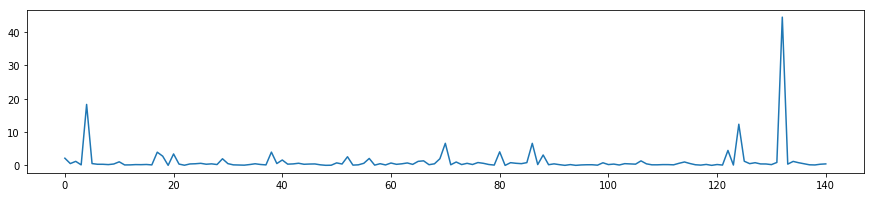

In [376]:
plt.figure(figsize=(15,3))
plt.plot(Xdataset["F48_31"].values)
#plt.plot(Ydataset)
plt.show()

In [377]:
Xdataset["F7_32"]

91     0.0
5      0.0
50     0.0
138    0.0
62     0.0
119    0.0
99     0.0
22     0.0
71     0.0
44     0.0
66     0.0
77     0.0
129    0.0
125    0.0
58     0.0
97     0.0
38     0.0
83     0.0
79     0.0
87     0.0
12     0.0
53     0.0
107    0.0
25     0.0
9      0.0
24     0.0
73     0.0
32     0.0
96     0.0
28     0.0
      ... 
80     0.0
103    0.0
92     0.0
131    0.0
132    0.0
21     0.0
7      0.0
140    0.0
118    0.0
84     0.0
18     0.0
30     0.0
136    0.0
19     0.0
3      0.0
54     0.0
128    0.0
90     0.0
139    0.0
116    0.0
81     0.0
68     0.0
74     0.0
41     0.0
76     0.0
2      0.0
93     0.0
43     0.0
70     0.0
57     0.0
Name: F7_32, Length: 141, dtype: float64

In [378]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(Xdataset)
dataset=dataset2.reshape(len(dataset),48,32)


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [379]:
Ydataset.shape

(141,)

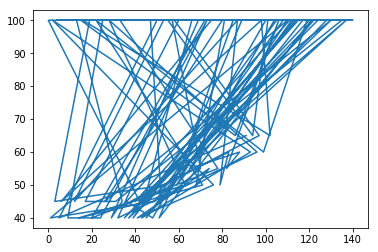

In [285]:
plt.plot(Ydataset)
plt.show()

In [201]:
Xdataset.shape

(141, 1536)

In [202]:
print(len(Xdataset))

141


In [203]:
# split into train and test sets
train_size = int(len(dataset) * 0.77)
test_size = len(dataset) - train_size
trainX = dataset[0:train_size,:]
testX= dataset[train_size:len(dataset),:]
print('data:',len(train), len(test))
print('data:',len(trainX), len(testX))
print('data:',len(dataset), len(Ydataset))

data: 122 19
data: 108 33
data: 141 141


In [290]:
# reshape into X=t and Y=t+1
look_width = 48
look_height=32
from sklearn import preprocessing 
from sklearn import utils
from io import StringIO

#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
le = preprocessing.LabelEncoder()
YN=utils.column_or_1d(Ydataset, warn=True)




In [287]:
YO=le.fit_transform(YN)
YO
len(le.classes_)

7

In [206]:
trainY = YO[0:train_size]
testY=YO[train_size:len(YO)]
print('data:',len(trainY), len(testY))


data: 108 33


In [207]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0],  trainX.shape[2],2))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [208]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
print(train.shape)

(108, 48, 32)
(108,)
(122, 1536)


In [212]:
testY

array([0, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 6, 6, 6,
       6, 6, 2, 3, 0, 2, 6, 4, 0, 3, 6])

In [213]:
seq_length = look_back
Yclasses=7
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(look_width,look_height)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(Yclasses, activation='softmax'))


In [214]:
trainYO = to_categorical(trainY, num_classes=Yclasses)
testYO = to_categorical(testY, num_classes=Yclasses)

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainYO,validation_data=(testX,testYO), batch_size=16, epochs=20)


Train on 108 samples, validate on 33 samples
Epoch 1/20
108/108 [==============================] - 0s 4ms/step - loss: 0.3794 - acc: 0.8426 - val_loss: 0.3027 - val_acc: 0.8571
Epoch 2/20
108/108 [==============================] - 0s 478us/step - loss: 0.3055 - acc: 0.8704 - val_loss: 0.2387 - val_acc: 0.9307
Epoch 3/20
108/108 [==============================] - 0s 501us/step - loss: 0.2488 - acc: 0.9153 - val_loss: 0.2032 - val_acc: 0.9481
Epoch 4/20
108/108 [==============================] - 0s 480us/step - loss: 0.2328 - acc: 0.9246 - val_loss: 0.1639 - val_acc: 0.9567
Epoch 5/20
108/108 [==============================] - 0s 492us/step - loss: 0.2045 - acc: 0.9365 - val_loss: 0.1492 - val_acc: 0.9524
Epoch 6/20
108/108 [==============================] - 0s 479us/step - loss: 0.1862 - acc: 0.9378 - val_loss: 0.1471 - val_acc: 0.9524
Epoch 7/20
108/108 [==============================] - 0s 485us/step - loss: 0.1773 - acc: 0.9378 - val_loss: 0.1378 - val_acc: 0.9524
Epoch 8/20
108/108 

In [215]:
score = model.evaluate(testX, testYO)
print(score)

33/33 [==============================] - 0s 117us/step
[0.09122767661006725, 0.9696969696969697]


In [216]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

108/108 [==============================] - 0s 77us/step
Test loss: 0.04711165141176294
Test accuracy: 0.9814814969345376


In [217]:
# Keras reported accuracy:
score = model.evaluate(testX,testYO, verbose=0) 
print(score[1])
# 0.98580000000000001

# Actual accuracy calculated manually:
predY= model.predict(trainX)
acc = sum([numpy.argmax(trainYO[i])==numpy.argmax(predY[i]) for i in range(len(trainYO))])/len(trainYO)
print(acc)
# 0.98580000000000001

print(score[1]==acc)
# True    

0.9696969696969697
0.9629629629629629
False


In [263]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)

In [267]:
print(trainX.shape)
mx1=trainX[1:2,:]
print(mx1.shape)
mx1


(108, 48, 32)
(1, 48, 32)


array([[[1.23089726, 0.66898165, 0.85799118, ..., 0.17556291,
         0.05176746, 0.        ],
        [2.19069742, 6.25536914, 5.50152958, ..., 1.09628015,
         1.48067688, 0.        ],
        [1.22801213, 1.39879001, 5.08663197, ..., 1.27187143,
         0.84706078, 0.        ],
        ...,
        [2.3947342 , 1.47194882, 0.35347227, ..., 0.12386816,
         0.03146046, 0.        ],
        [2.65686878, 1.07038819, 0.52281498, ..., 0.14667365,
         0.01805834, 0.        ],
        [0.4852845 , 0.77797663, 0.18853634, ..., 0.1193772 ,
         0.12297179, 0.        ]]])

In [299]:
#col1;col2;col3;col21;col22;col23;col31;col32;co3l3;col321;col322;col323;col41;col42;col43;col421;col422;col423;col431;col432;co43l3;co4l321;col4322;col4323;
TESTDATA = StringIO("""1;4.4;99; 2;4.5;200;    3;4.7;65    4;3.2;140;    1;4.4;99; 2;4.5;200;    3;4.7;3.2;    1;4.4;99; 2;4.5;200;    3;4.7;65    4;3.2;140;
    """)
mdf = pandas.read_csv(TESTDATA, sep=";")
mdf

,1,4.4,99,2,4.5,200,3,4.7,65 4,3.2,...,99.2,2.2,4.5.2,200.2,3.2,4.7.2,65 4.1,3.2.2,140.1,Unnamed: 31


In [335]:
TD2=StringIO("""A;B;C
1;2;3
11;22;33
""")
mdf = pandas.read_csv(TD2, sep=";")
print(mdf)
mdf[0:1]

    A   B   C
0   1   2   3
1  11  22  33


,A,B,C
0,1,2,3


In [367]:
mdf=numpy.fromstring("1,2,3,4,5,6,7,8,9,1,2,3,5,7,8,8,8,8,8,9", sep=',')
#ndf=utils.column_or_1d(mdf, warn=True)
n2=mdf.reshape(1,2,-1)
#n3=n2.reshape(1,1,19)
n2

array([[[1., 2., 3., 4., 5., 6., 7., 8., 9., 1.],
        [2., 3., 5., 7., 8., 8., 8., 8., 8., 9.]]])

In [368]:
mp1=model.predict(n2)
print(mp1)


ValueError: Error when checking : expected conv1d_25_input to have shape (48, 32) but got array with shape (2, 10)

In [380]:

mx1=testX[0:1,:]
print('mx1',mx1.shape)
mp1=model.predict(mx1)
print(mp1)
tmp1=numpy.argmax(mp1,1)
print(tmp1)


mx1 (1, 48, 32)
[[9.9245280e-01 2.4215181e-04 4.9515753e-03 1.0738717e-05 4.1588599e-05
  8.6684158e-06 2.2923348e-03]]
[0]


In [277]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
diffY=testPredict-testY
diffY
#len(testPredict)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -2,  3,  2,  0,  4,  0,  1,  0,  2,  0])

In [278]:
testPredict

array([0, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 6, 6, 6,
       6, 4, 5, 5, 0, 6, 6, 5, 0, 5, 6])

In [282]:
testY

array([0, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 6, 6, 6,
       6, 6, 2, 3, 0, 2, 6, 4, 0, 3, 6])

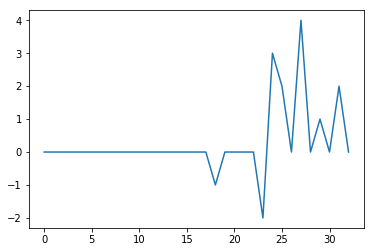

In [221]:
plt.plot(diffY)
plt.show()

In [222]:
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [223]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.491 RMSE
Test Score: 1.087 RMSE


In [234]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
print(trainPredictPlot.shape)
trainPredictPlot[look_back:len(trainPredict)+look_back, 0] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, 0] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

(141, 48, 32)


ValueError: could not broadcast input array from shape (108) into shape (81,32)

In [239]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(Ydataset)
trainPredictPlot[:] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict)+wws] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(Ydataset)
testPredictPlot[:] = numpy.nan
testPredictPlot.shape

(141,)

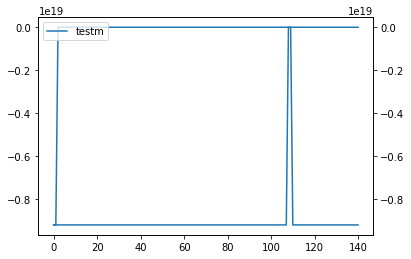

In [244]:
testPredictPlot[len(trainPredict):len(Ydataset)] = testPredict
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
#ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()